In [1]:
from windspharm.xarray import VectorWind
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt
import os 
import xesmf as xe

In [10]:
# ## +++ vars in: 
# f1_in='f.e.FTORCHmjo_CNNmjo.cam.h1.U200.1979010100000-1993122700000.nc'
# f2_in='f.e.FTORCHmjo_CNNmjo.cam.h1.V200.1979010100000-1993122700000.nc'
# f_out='f.e.FTORCHmjo_CNNmjo.cam.h1.VP200.1979010100000-1993122700000.nc'
# dir_in = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNNmjo/ts/'
# ## --- vars in: 

# ## +++ vars in: 
# f1_in='f.e.FTORCHmjo_MEANmjo.cam.h1.U200.1979010100000-1993122700000.nc'
# f2_in='f.e.FTORCHmjo_MEANmjo.cam.h1.V200.1979010100000-1993122700000.nc'
# f_out='f.e.FTORCHmjo_MEANmjo.cam.h1.VP200.1979010100000-1993122700000.nc'
# dir_in = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_MEANmjo/ts/'
# ## --- vars in: 

# ## +++ vars in: 
# f1_in='f.e.FTORCHmjo_CNTRLmjo.cam.h1.U200.1979010100000-1993122700000.nc'
# f2_in='f.e.FTORCHmjo_CNTRLmjo.cam.h1.V200.1979010100000-1993122700000.nc'
# f_out='f.e.FTORCHmjo_CNTRLmjo.cam.h1.VP200.1979010100000-1993122700000.nc'
# dir_in = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNTRLmjo/ts/'
# ## --- vars in: 

# ## +++ vars in: ERA5.h1.U200.1979010100000-1993123100000.nc
# f1_in='ERA5.h1.U200.1979010100000-1993123100000.nc'
# f2_in='ERA5.h1.V200.1979010100000-1993123100000.nc'
# f_out='ERA5.h1.VP200.1979010100000-1993123100000.nc'
# dir_in = '/glade/derecho/scratch/wchapman/ADF/ERA5_data/ts/'
# ## --- vars in: 

## +++ vars in: ERA5.h1.U200.1979010100000-1993123100000.nc
f1_in='f.e.FTORCHmjo_meanGPU_exp001.cam.h1.U200.1979010100000-1993123100000.nc'
f2_in='f.e.FTORCHmjo_meanGPU_exp001.cam.h1.V200.1979010100000-1993123100000.nc'
f_out='f.e.FTORCHmjo_meanGPU_exp001.cam.h1.VP200.1979010100000-1993123100000.nc'
dir_in = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_meanGPU_exp001/ts/'
## --- vars in: 


In [11]:
def regrid_small(inBIG,method='bilinear',level=None):
    """
    Regrid the input variable from a list of files to a predefined grid.

    Parameters:
    - file_list (list): List of input files.
    - varin (str): Input variable name.
    - varout (str): Output variable name.
    - method (str): Resampling method (default is 'bilinear').
    - level (str, optional): Vertical level to select (default is None).

    Returns:
    - xr.Dataset: Regridded dataset.
    """
        
    ds_out = xr.open_dataset('/glade/work/wchapman/ADF_obs_Mar2024/CERES_EBAF_Ed4.1_2001-2020.nc')
    fn ='./bilinear_192x288_180x360.nc'
    regridder = xe.Regridder(inBIG, ds_out, "bilinear", weights=fn)
    outSMALL = regridder(inBIG)
    return outSMALL

def regrid_big(inBIG,method='bilinear',level=None):
    """
    Regrid the input variable from a list of files to a predefined grid.

    Parameters:
    - file_list (list): List of input files.
    - varin (str): Input variable name.
    - varout (str): Output variable name.
    - method (str): Resampling method (default is 'bilinear').
    - level (str, optional): Vertical level to select (default is None).

    Returns:
    - xr.Dataset: Regridded dataset.
    """
        
    ds_out = xr.open_dataset('/glade/work/wchapman/miles-rollout/notebooks/gather_global_data/ML_1deg_grid.nc')
    regridder = xe.Regridder(inBIG, ds_out, "bilinear")
    outSMALL = regridder(inBIG)
    return outSMALL

In [12]:
file_path = os.path.join(dir_in, f1_in)  # Join the directory and file name
DS = xr.open_dataset(file_path)
file_path = os.path.join(dir_in, f2_in)  # Join the directory and file name
DS2 = xr.open_dataset(file_path)

#regrid to small:
print('...regridding...')
DS2_small = regrid_small(DS2)
DS_small = regrid_small(DS)

w = VectorWind(DS_small['U200'], DS2_small['V200'])
sf, vp = w.sfvp()
vp = vp.to_dataset(name='VP200')
vp = regrid_big(vp['VP200'])
vp = vp.to_dataset(name='VP200')
# Optional: Update specific attributes if necessary
vp['VP200'].attrs['long_name'] = 'Velocity Potential m2s-1'
vp['VP200'].attrs['units'] = 'm2s-1'  # Ensure the unit is correct for PRECT
# vp = vp.drop('VP200')
vp.to_netcdf(os.path.join(dir_in, f_out))
vp.to_netcdf(f_out)

...regridding...


/glade/u/home/wchapman/.local/lib/python3.9/site-packages/xarray/core/dataarray.py:866: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/glade/u/apps/opt/conda/envs/npl-2023a/lib/python3.9/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


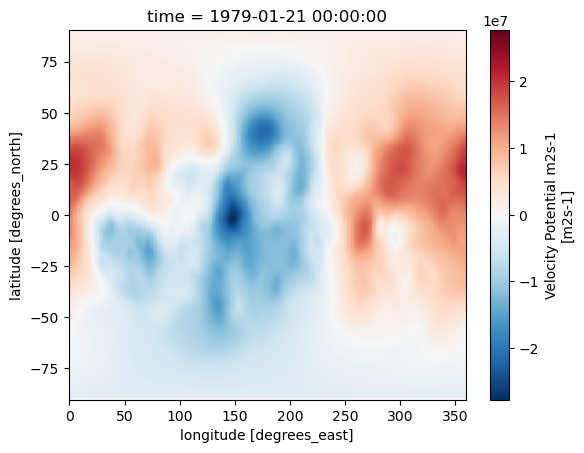

In [13]:
vp['VP200'].isel(time=20).plot()